Fire Incidents

In [2]:
#Importing pandas
import pandas as pd

An example of what the csv looks like:

In [3]:
#Reading from the csv
fire = pd.read_csv("fire_incidents.csv")
fire.head(20)

,_id,call_no,incident_type,type_description,address,alarms,alarm_time,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",1,2016-04-21T05:01:04,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,2,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",1,2018-03-13T08:34:43,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,3,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",0,2018-03-13T11:54:23,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,4,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",0,2017-05-31T08:39:47,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,5,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",1,2018-03-09T10:26:42,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607
5,6,F180021782,150.0,"Outside rubbish fire, Other","S 7TH ST & E CARSON ST, PITTSBURGH PA 15203",0,2018-03-12T09:13:28,231EN24,1702.0,South Side Flats,3.0,17.0,4.200317e+10,4.0,17.0,3.0,4-2,40.428618,-79.992239
6,7,F180022495,113.0,"Cooking fire, confined to container","200 BLOCK E OHIO ST, PITTSBURGH PA 15212",1,2018-03-14T19:46:10,231EN32,2204.0,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-6,40.453022,-80.003660
7,8,F180022546,111.0,Building fire,"7000 BLOCK LEMINGTON AVE, PITTSBURGH PA 15206",1,2018-03-14T23:49:22,231EN15,1203.0,Lincoln-Lemington-Belmar,9.0,12.0,4.200312e+10,2.0,12.0,5.0,3-18,40.471358,-79.898240
8,9,F180022773,111.0,Building fire,"100 BLOCK SPENCER AVE, PITTSBURGH PA 15227",1,2018-03-15T20:39:05,231EN23,2904.0,Carrick,4.0,29.0,4.200329e+10,4.0,29.0,3.0,4-15,40.385494,-79.977200
9,10,F170044316,131.0,Passenger vehicle fire,"1200 BLOCK WESTFIELD ST, PITTSBURGH PA 15216",0,2017-06-03T01:31:13,231EN28,1916.0,Beechview,4.0,19.0,4.200319e+10,5.0,19.0,6.0,4-28,40.415219,-80.019516


Creating a dictionary to determine how many fire incidents each neighborhood had

In [4]:
newdict = dict()

#Iterates through each row in the csv and either creates a new dictionary entry
#for the neighborhood or adds to the count for already existing ones
for index, row in fire.iterrows():
    if fire.neighborhood[index] in newdict:
        number = newdict[fire.neighborhood[index]]
        newdict[fire.neighborhood[index]] = number + 1
    else:
        newdict[fire.neighborhood[index]]=1
        
#Demonstration of the contents of the dictionary
print(newdict)

{nan: 1396, 'Fineview': 48, 'Fairywood': 26, 'South Side Flats': 260, 'Allegheny Center': 62, 'Lincoln-Lemington-Belmar': 193, 'Carrick': 283, 'Beechview': 146, 'Allentown': 125, 'Beltzhoover': 129, 'Crafton Heights': 84, 'Homewood North': 182, 'Squirrel Hill South': 252, 'Perry North': 108, 'Bedford Dwellings': 42, 'Homewood South': 189, 'East Allegheny': 130, 'Crawford-Roberts': 108, 'Sheraden': 172, 'Middle Hill': 104, 'Strip District': 61, 'East Hills': 154, 'Garfield': 109, 'Greenfield': 114, 'North Shore': 64, 'Spring Hill-City View': 103, 'Central Business District': 266, 'Upper Hill': 44, 'Manchester': 78, 'Overbrook': 57, 'Polish Hill': 39, 'Central Lawrenceville': 74, 'Brookline': 187, 'Marshall-Shadeland': 141, 'North Oakland': 125, 'South Oakland': 91, 'Homewood West': 61, 'East Liberty': 207, 'Hazelwood': 244, 'Squirrel Hill North': 130, 'Friendship': 32, 'West Oakland': 61, 'Terrace Village': 85, 'Brighton Heights': 153, 'Troy Hill': 84, 'Windgap': 23, 'Knoxville': 178, '

Determining which neighborhood had the least and how many they had

In [5]:
least = 10000
order = []
order_num = []
new_list = []
new_two = []

# goes through and adds each neighborhood and their corresponding number to two lists and finds the least
for item in newdict:
    if newdict[item] < least:
        neigh = item
        least = newdict[item]
    order.append(item)
    order_num.append(newdict[item])

#Sorts the neighborhoods least to most
while order_num:
    minimum = order_num[0]
    place = order[0]
    hold = 0
    for x in order_num: 
        if x < minimum:
            minimum = x
            place = order[hold]
        hold += 1
            
    new_list.append(minimum)
    order_num.remove(minimum)
    new_two.append(place)
    order.remove(place)

order_num = new_list
order = new_two

print(neigh)
print(least)
print(order)
print(order_num)

Mount Oliver Borough
6
['Mount Oliver Borough', 'Regent Square', 'East Carnegie', 'Mt. Oliver', 'Ridgemont', 'St. Clair', 'Arlington Heights', 'Oakwood', 'Swisshelm Park', 'Chartiers City', 'Glen Hazel', 'Summer Hill', 'New Homestead', 'Bon Air', 'West End', 'Esplen', 'Windgap', 'South Shore', 'Spring Garden', 'Hays', 'Fairywood', 'Westwood', 'Friendship', 'Morningside', 'Polish Hill', 'California-Kirkbride', 'Duquesne Heights', 'Chateau', 'Bedford Dwellings', 'Allegheny West', 'Upper Hill', 'Fineview', 'Point Breeze North', 'Upper Lawrenceville', 'Arlington', 'Lower Lawrenceville', 'Overbrook', 'Stanton Heights', 'Banksville', 'Strip District', 'Homewood West', 'West Oakland', 'Allegheny Center', 'North Shore', 'Lincoln Place', 'Northview Heights', 'Point Breeze', 'Elliott', 'Central Lawrenceville', 'Manchester', 'Highland Park', 'Crafton Heights', 'Troy Hill', 'Terrace Village', 'South Oakland', 'Central Oakland', 'South Side Slopes', 'Spring Hill-City View', 'Middle Hill', 'Perry No

A plot for a visual representation of fire incidents or the ten neightborhoods with the least

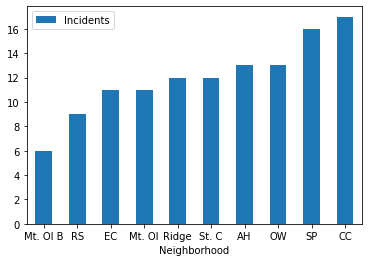

In [6]:
df = pd.DataFrame({'Neighborhood':['Mt. Ol B', 'RS', 'EC', 'Mt. Ol', 'Ridge', 'St. C', 'AH', 'OW', 'SP', 'CC'], 'Incidents':[6, 9, 11, 11, 12, 12, 13, 13, 16, 17]})
ax = df.plot.bar(x='Neighborhood', y='Incidents', rot=0)

Finding the earliest dated fire:

In [7]:
when = dict()

for index, row in fire.iterrows():
    time = str(fire.alarm_time[index])
    time = time[:4]
    if time in when:
        number = when[time]
        when[time] = number + 1
    else:
        when[time]=1

print(when)

{'2016': 1054, '2018': 687, '2017': 930, '2013': 1071, '2015': 1114, '2014': 1065, 'nan': 18, '2019': 741, '2020': 810, '2021': 776, '2022': 728, '2023': 537}


The earliest fire was in 2013.

What Kinds of Fires are happening?

In [8]:
print(fire['type_description'].value_counts())
fire_type = newdict

Cooking fire, confined to container                   2167
Building fire                                         2003
Passenger vehicle fire                                1085
Outside rubbish, trash or waste fire                   744
Brush or brush-and-grass mixture fire                  570
Outside rubbish fire, Other                            548
Dumpster or other outside trash receptacle fire        448
Trash or rubbish fire, contained                       433
Natural vegetation fire, Other                         255
Special outside fire, Other                            252
Mobile property (vehicle) fire, Other                  198
Fires in structure other than in a building            134
Grass fire                                             130
Fire, Other                                            127
Outside equipment fire                                  75
Fuel burner/boiler malfunction, fire confined           61
Road freight or transport vehicle fire                  

Cooking fires that are confined to a container are less dangerous, so let's take a look at the data without those fires included

In [9]:

for index, row in fire.iterrows():
    if fire.type_description[index] == "Cooking fire, confined to container":
        number = newdict[fire.neighborhood[index]]
        newdict[fire.neighborhood[index]] = number-1
        
print(fire_type)

{nan: 1099, 'Fineview': 30, 'Fairywood': 19, 'South Side Flats': 191, 'Allegheny Center': 45, 'Lincoln-Lemington-Belmar': 140, 'Carrick': 231, 'Beechview': 121, 'Allentown': 101, 'Beltzhoover': 111, 'Crafton Heights': 59, 'Homewood North': 154, 'Squirrel Hill South': 176, 'Perry North': 85, 'Bedford Dwellings': 30, 'Homewood South': 150, 'East Allegheny': 97, 'Crawford-Roberts': 69, 'Sheraden': 133, 'Middle Hill': 69, 'Strip District': 49, 'East Hills': 106, 'Garfield': 80, 'Greenfield': 85, 'North Shore': 58, 'Spring Hill-City View': 82, 'Central Business District': 206, 'Upper Hill': 38, 'Manchester': 62, 'Overbrook': 49, 'Polish Hill': 36, 'Central Lawrenceville': 63, 'Brookline': 153, 'Marshall-Shadeland': 119, 'North Oakland': 68, 'South Oakland': 75, 'Homewood West': 48, 'East Liberty': 141, 'Hazelwood': 197, 'Squirrel Hill North': 71, 'Friendship': 22, 'West Oakland': 44, 'Terrace Village': 53, 'Brighton Heights': 120, 'Troy Hill': 71, 'Windgap': 20, 'Knoxville': 152, 'Upper Law

Carrick                      231
Central Business District    206
Hazelwood                    197
South Side Flats             191
Mount Washington             186
Squirrel Hill South          176
Homewood North               154
Brookline                    153
Knoxville                    152
Homewood South               150
East Liberty                 141
Lincoln-Lemington-Belmar     140
Sheraden                     133
Bloomfield                   129
Beechview                    121
Perry South                  120
Brighton Heights             120
Marshall-Shadeland           119
Bluff                        114
Beltzhoover                  111
Shadyside                    110
East Hills                   106
Larimer                      102
Allentown                    101
East Allegheny                97
South Side Slopes             92
Greenfield                    85
Perry North                   85
Central Northside             83
Spring Hill-City View         82
Garfield  

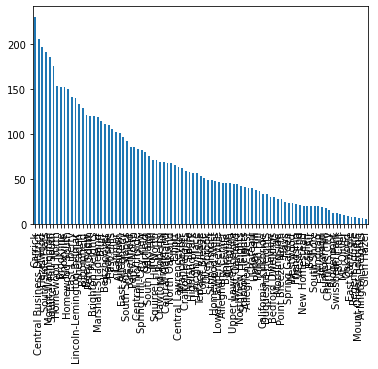

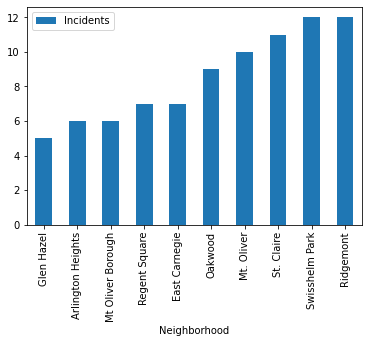

In [10]:
fire_type = fire[fire["type_description"].str.contains('Cooking fire, confined to container')==False]
pd.set_option("display.max_rows", None)
print(fire_type['neighborhood'].value_counts())
fire_type['neighborhood'].value_counts().plot.bar()
df = pd.DataFrame({'Neighborhood':['Glen Hazel', 'Arlington Heights', 'Mt Oliver Borough', 'Regent Square', 'East Carnegie', 'Oakwood', 'Mt. Oliver', 'St. Claire', 'Swisshelm Park', 'Ridgemont'], 'Incidents':[5, 6, 6, 7, 7, 9, 10, 11, 12, 12]})
ax = df.plot.bar(x='Neighborhood', y='Incidents', rot=90)